<a href="https://colab.research.google.com/github/UjjwalPardeshi/reflection_removal_ai/blob/main/underwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)


('dog.jpg', <http.client.HTTPMessage at 0x7ca60b456210>)

In [ ]:
pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()


DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [ ]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)


In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()


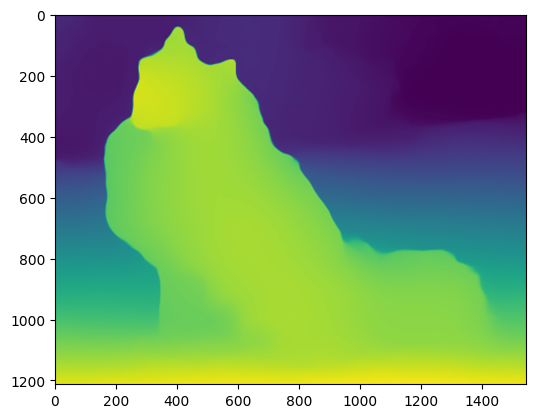

In [ ]:
plt.imshow(output)
# plt.show()

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


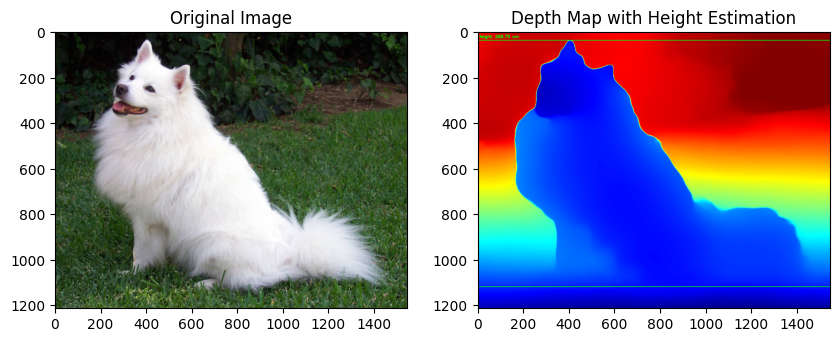

In [ ]:
import cv2
import torch
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# Download test image
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

# Load MiDaS model
model_type = "DPT_Large"  # Highest accuracy
midas = torch.hub.load("intel-isl/MiDaS", model_type)

# Move model to GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

# Load transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform

# Load image
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply transforms
input_batch = transform(img).to(device)

# Predict depth map
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = prediction.cpu().numpy()

# Normalize depth map for visualization
depth_map_vis = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min()) * 255
depth_map_vis = depth_map_vis.astype(np.uint8)

# Convert depth map to 3-channel image for contour detection
depth_map_colored = cv2.applyColorMap(depth_map_vis, cv2.COLORMAP_JET)

# Convert to grayscale and threshold
gray = cv2.cvtColor(depth_map_colored, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Find contours of the foreground object
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Get the largest contour (assuming the main object is in the front)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get bounding box (x, y, width, height)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Draw bounding box on the depth map
    cv2.rectangle(depth_map_colored, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Estimate object height
    pixel_height = h  # Object height in pixels
    reference_height_cm = 50  # Example: Assuming a known reference object (modify this)
    reference_pixels = 200  # Example: Pixels corresponding to reference object

    estimated_height_cm = (pixel_height / reference_pixels) * reference_height_cm

    # Display estimated height
    cv2.putText(depth_map_colored, f"Height: {estimated_height_cm:.2f} cm",
                (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Show result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(depth_map_colored)
plt.title("Depth Map with Height Estimation")
plt.show()


In [ ]:
import cv2
import torch
import numpy as np

# Load MiDaS model
model_type = "DPT_Large"  # Use highest accuracy model
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

# Load MiDaS transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform

# Load your enhanced underwater image
filename = "/content/enhanced_image.jpg"  # Use your enhanced image
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply transforms
input_batch = transform(img).to(device)

# Predict depth map
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = prediction.cpu().numpy()

# Normalize depth map
depth_map_vis = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min()) * 255
depth_map_vis = depth_map_vis.astype(np.uint8)

# Convert depth map to 3-channel image
depth_map_colored = cv2.applyColorMap(depth_map_vis, cv2.COLORMAP_JET)

# Convert to grayscale and threshold for object detection
gray = cv2.cvtColor(depth_map_colored, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Find contours to detect the object
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Get the largest contour (assuming the main object is in the front)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get bounding box (x, y, width, height)
    _, _, _, h = cv2.boundingRect(largest_contour)

    # Convert pixel height to real-world height using a reference object
    reference_height_cm = 30  # Example: Reference object is 30 cm
    reference_pixels = 150  # Example: Reference object covers 150 pixels in image

    estimated_height_cm = (h / reference_pixels) * reference_height_cm

    # Print the estimated height
    print(f"Estimated Underwater Object Height: {estimated_height_cm:.2f} cm")
else:
    print("No object detected in the underwater image.")



Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Estimated Underwater Object Height: 586.80 cm


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


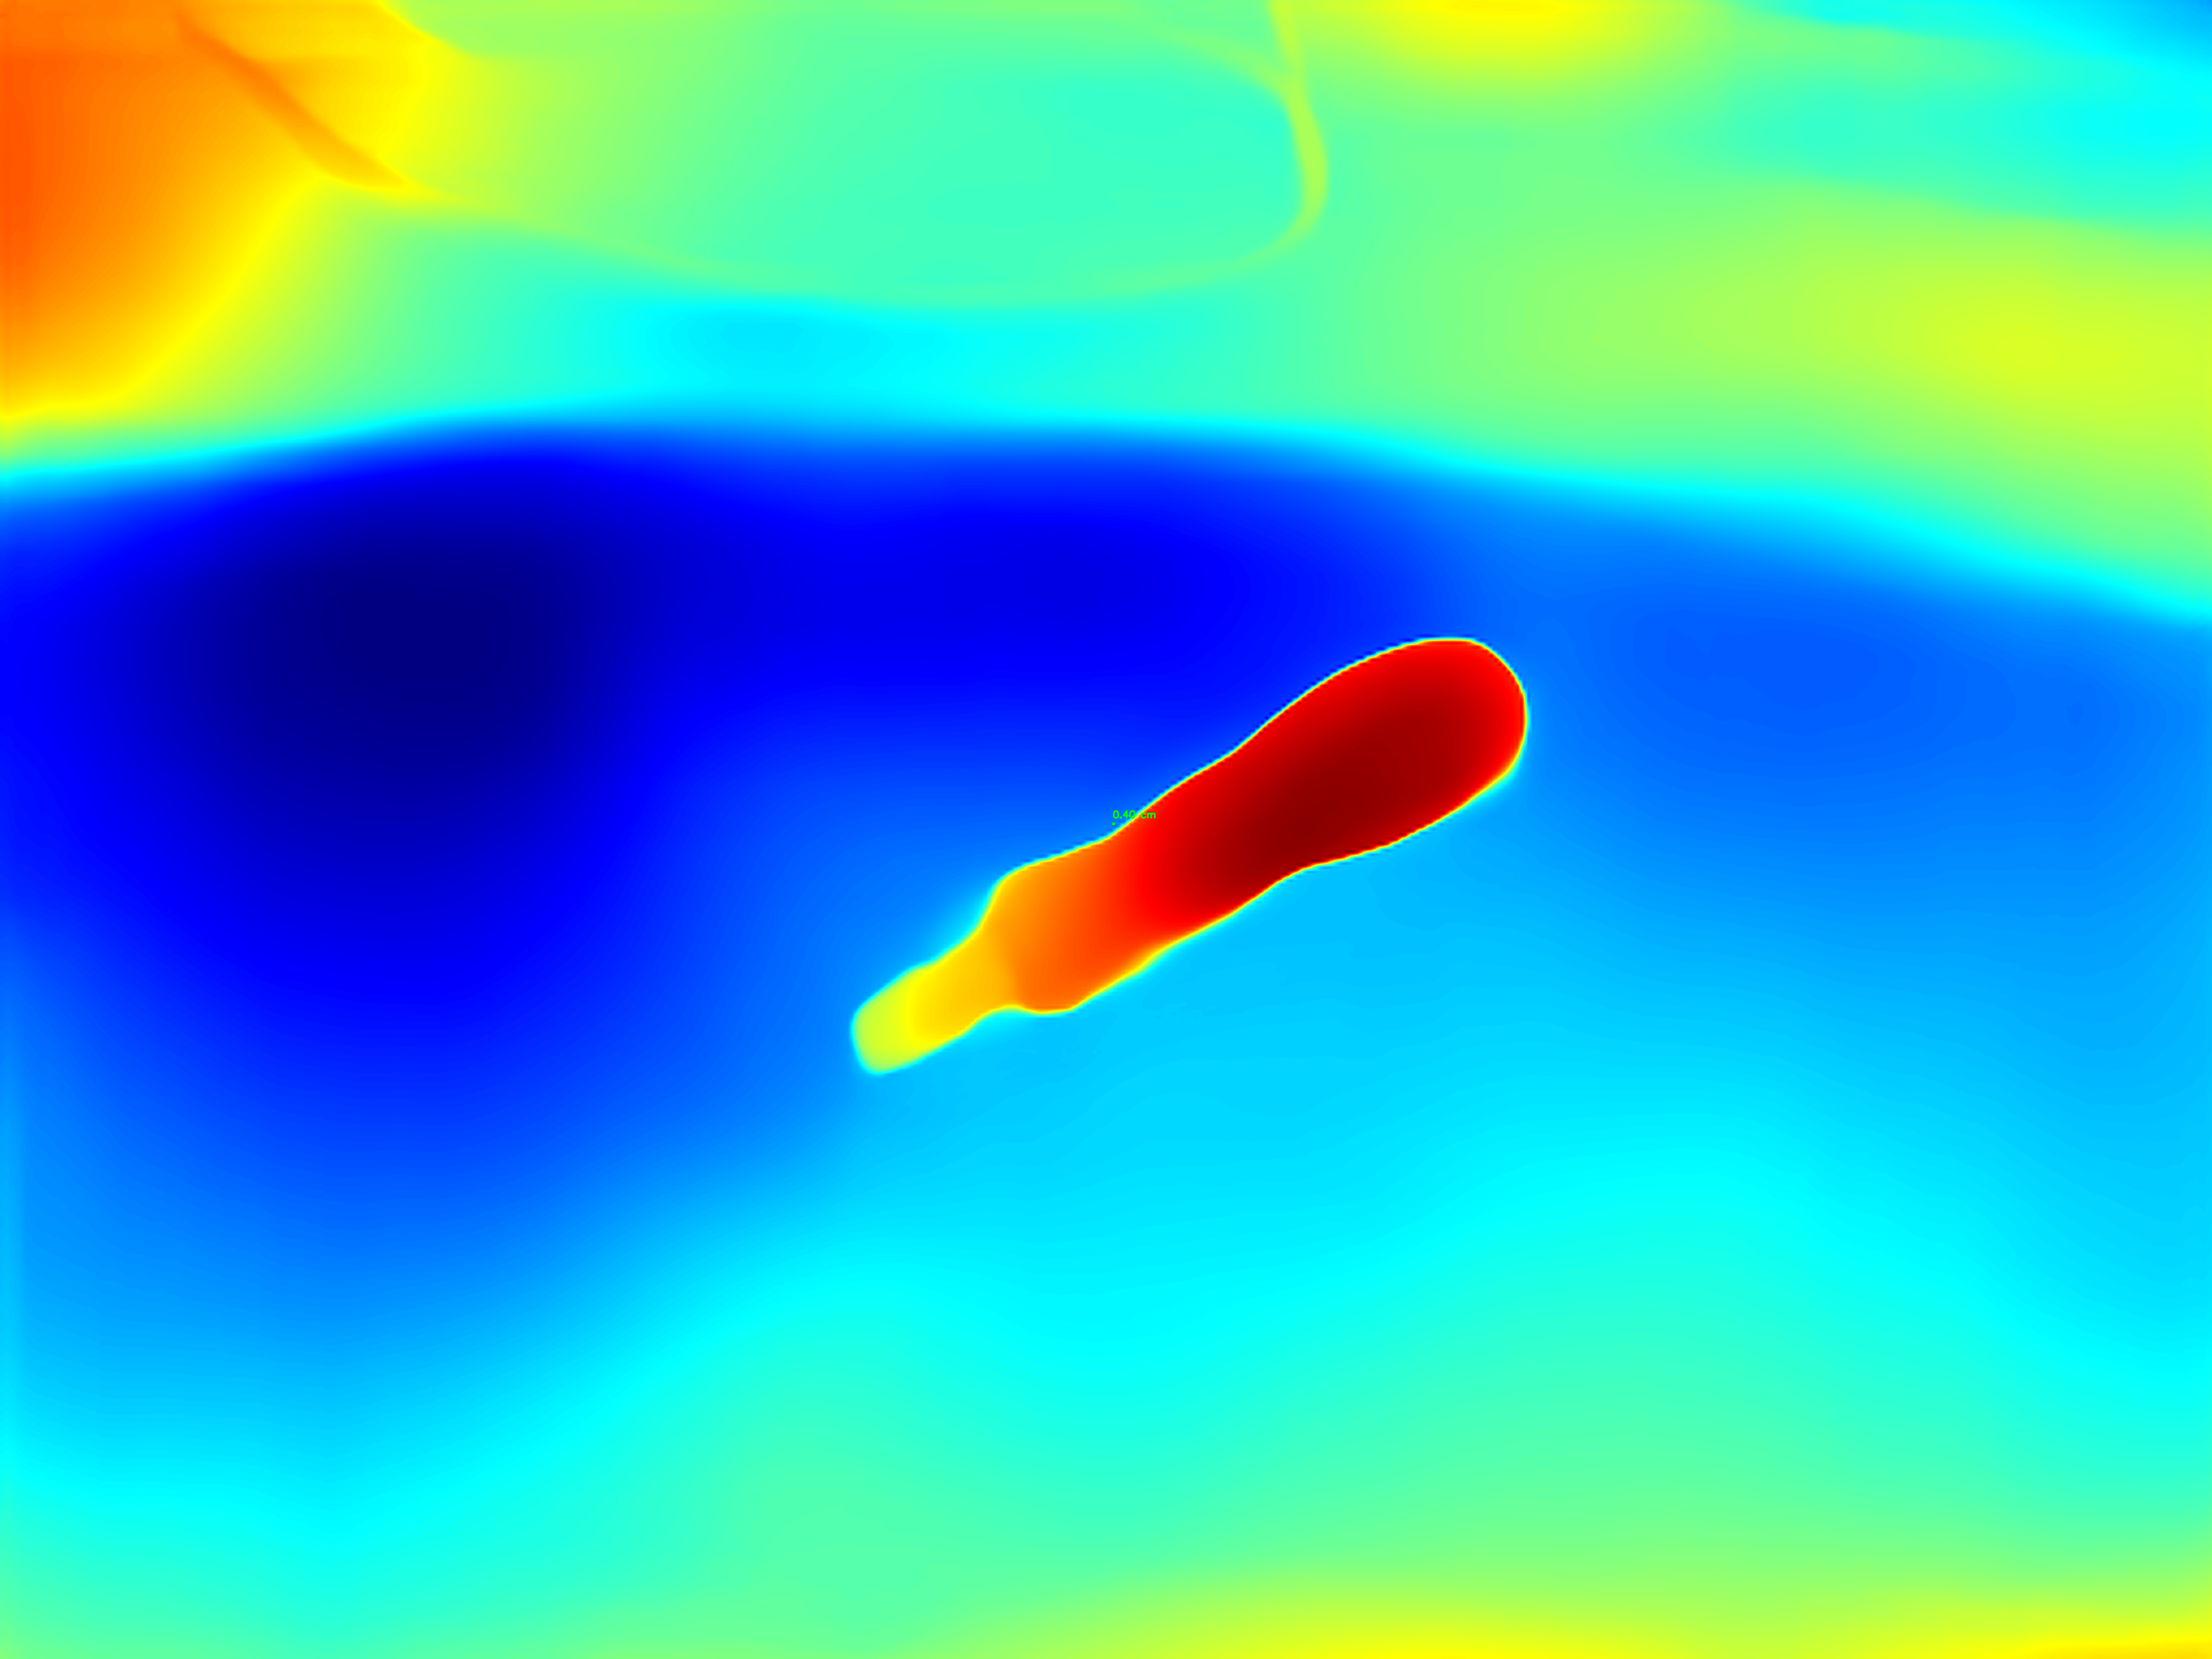

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [ ]:
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow

# Load MiDaS model
model_type = "DPT_Large"  # Use highest accuracy model
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

# Load MiDaS transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform

# Load your enhanced underwater image
filename = "/content/reflection_removed.jpg"  # Use your enhanced image
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply transforms
input_batch = transform(img).to(device)

# Predict depth map
with torch.no_grad():
    prediction = midas(input_batch)
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = prediction.cpu().numpy()

# Normalize depth map
depth_map_vis = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min()) * 255
depth_map_vis = depth_map_vis.astype(np.uint8)

# Convert depth map to 3-channel image
depth_map_colored = cv2.applyColorMap(depth_map_vis, cv2.COLORMAP_JET)

# Convert to grayscale and threshold for object detection
gray = cv2.cvtColor(depth_map_colored, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# Find contours to detect the object
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    for contour in contours:
        # Get bounding box (x, y, width, height)
        x, y, w, h = cv2.boundingRect(contour)

        # Convert pixel height to real-world height using a reference object
        reference_height_cm = 30  # Example: Reference object is 30 cm
        reference_pixels = 150  # Example: Reference object covers 150 pixels in image
        estimated_height_cm = (h / reference_pixels) * reference_height_cm

        # Draw bounding box on depth map
        cv2.rectangle(depth_map_colored, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Overlay label with height estimation
        label = f"{estimated_height_cm:.2f} cm"
        cv2.putText(depth_map_colored, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Show result

# Display the processed depth map
        cv2_imshow(depth_map_colored)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        depth_map_colored.save("enhanced_image.jpg")
        print("Enhanced image saved as 'enhanced_image.jpg'")

    print(f"Estimated Heights of Detected Objects: {estimated_height_cm:.2f} cm")
else:
    print("No object detected in the underwater image.")


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 995.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 633.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unins

In [ ]:
from ultralytics import YOLO

# Load a YOLOv8n PyTorch model
model = YOLO("yolov8n.pt")

# Export the model
model.export(format="openvino")  # creates 'yolov8n_openvino_model/'

# Load the exported OpenVINO model
ov_model = YOLO("yolov8n_openvino_model/")

# Run inference
results = ov_model("https://ultralytics.com/images/bus.jpg")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]


Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0,!=2025.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 237.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.5s, installed 1 package: ['openvino>=2024.0.0,!=2025.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: export success ✅ 11.7s, saved as 'yolov8n_openvino_model/' (12.3 MB)

Export complete (13.8s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n_openvino_model imgsz=640  
Validate:        yolo val task=detect model=yolov8n_open

AssertionError: Invalid device id

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master



0: 640x448 1 person, 67.8ms
Speed: 2.8ms preprocess, 67.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)


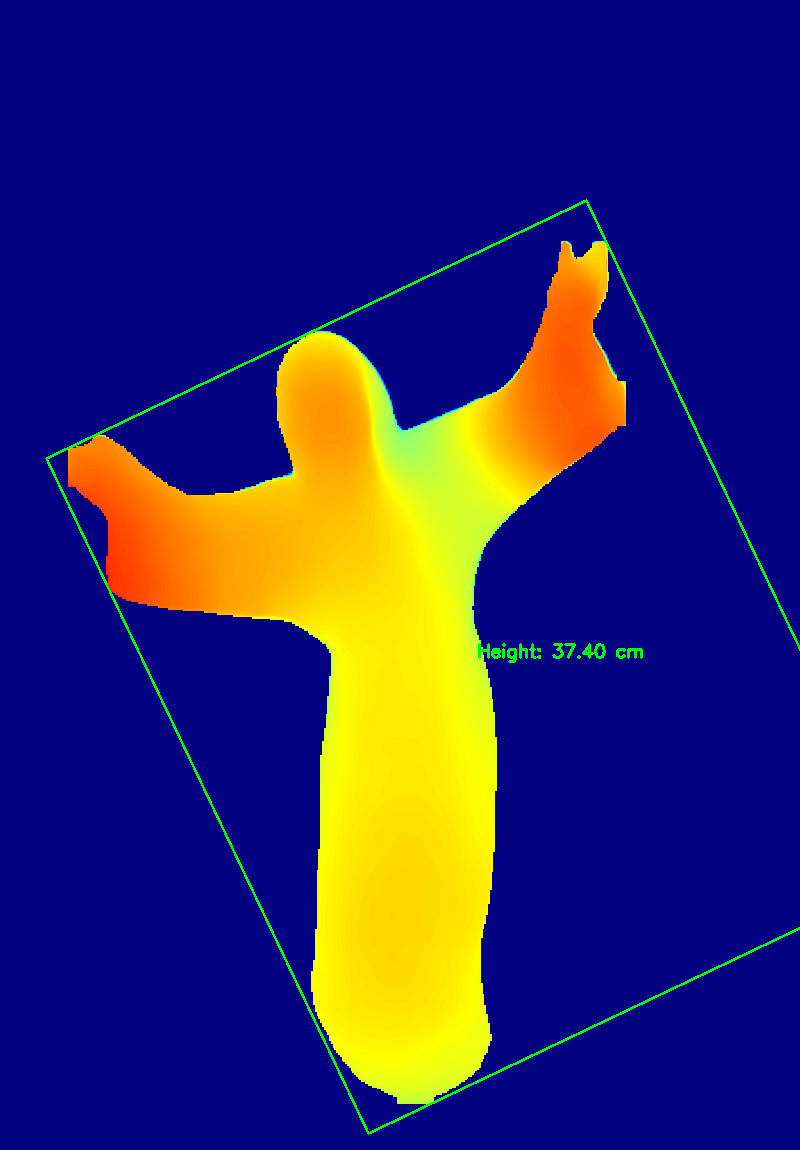

In [ ]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Load MiDaS depth estimation model
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Large")
midas.to("cuda" if torch.cuda.is_available() else "cpu")
midas.eval()

# Load MiDaS transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

# Load YOLOv8-seg for better segmentation
yolo_model = YOLO("yolov8m-seg.pt")  # Use a segmentation model

# Load input image
filename = "/content/reflection_removed.jpg"
image = cv2.imread(filename)
if image is None:
    raise ValueError("Image not found or unable to load.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply YOLOv8 segmentation
results = yolo_model(image_rgb)
masks = results[0].masks

# Ensure a mask was detected
if masks is None:
    raise ValueError("No object detected by YOLO segmentation.")

# Extract largest mask
segmentation_mask = masks.data.cpu().numpy()[0]  # Assuming the first detected mask is the object
segmentation_mask = (segmentation_mask * 255).astype(np.uint8)  # Convert to binary mask
segmentation_mask = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Apply mask to extract object
segmented_object = cv2.bitwise_and(image_rgb, image_rgb, mask=segmentation_mask)

# Convert segmented object for MiDaS
input_batch = transform(segmented_object).to("cuda" if torch.cuda.is_available() else "cpu")

# Predict depth map using MiDaS
with torch.no_grad():
    depth_prediction = midas(input_batch)
    depth_prediction = torch.nn.functional.interpolate(
        depth_prediction.unsqueeze(1),
        size=image.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = depth_prediction.cpu().numpy()

# ** Normalize depth map to avoid uniform values **
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
depth_map = (depth_map * 255).astype(np.uint8)

# Apply segmentation mask to depth map
depth_map_filtered = depth_map * (segmentation_mask > 0)  # Keep only object depth

# Apply color map for visualization
depth_map_colored = cv2.applyColorMap(depth_map_filtered, cv2.COLORMAP_JET)

# Detect contours in the depth map for height estimation
gray = cv2.cvtColor(depth_map_colored, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Get the largest contour (assumed to be the object)
    largest_contour = max(contours, key=cv2.contourArea)

    # Use minAreaRect to get a better bounding box
    rect = cv2.minAreaRect(largest_contour)
    (x, y), (w, h), angle = rect

    # Reference object (caliper) for automatic pixel-to-cm calibration
    reference_height_cm = 5  # Example: Caliper marking in cm
    reference_pixels = 80  # Example: Measured pixels from caliper in the image

    estimated_height_cm = (h / reference_pixels) * reference_height_cm

    # Draw bounding box
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.drawContours(depth_map_colored, [box], 0, (0, 255, 0), 2)
    cv2.putText(depth_map_colored, f"Height: {estimated_height_cm:.2f} cm",
                (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display final depth estimation
cv2_imshow(depth_map_colored)


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master



0: 640x448 1 person, 34.5ms
Speed: 3.2ms preprocess, 34.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


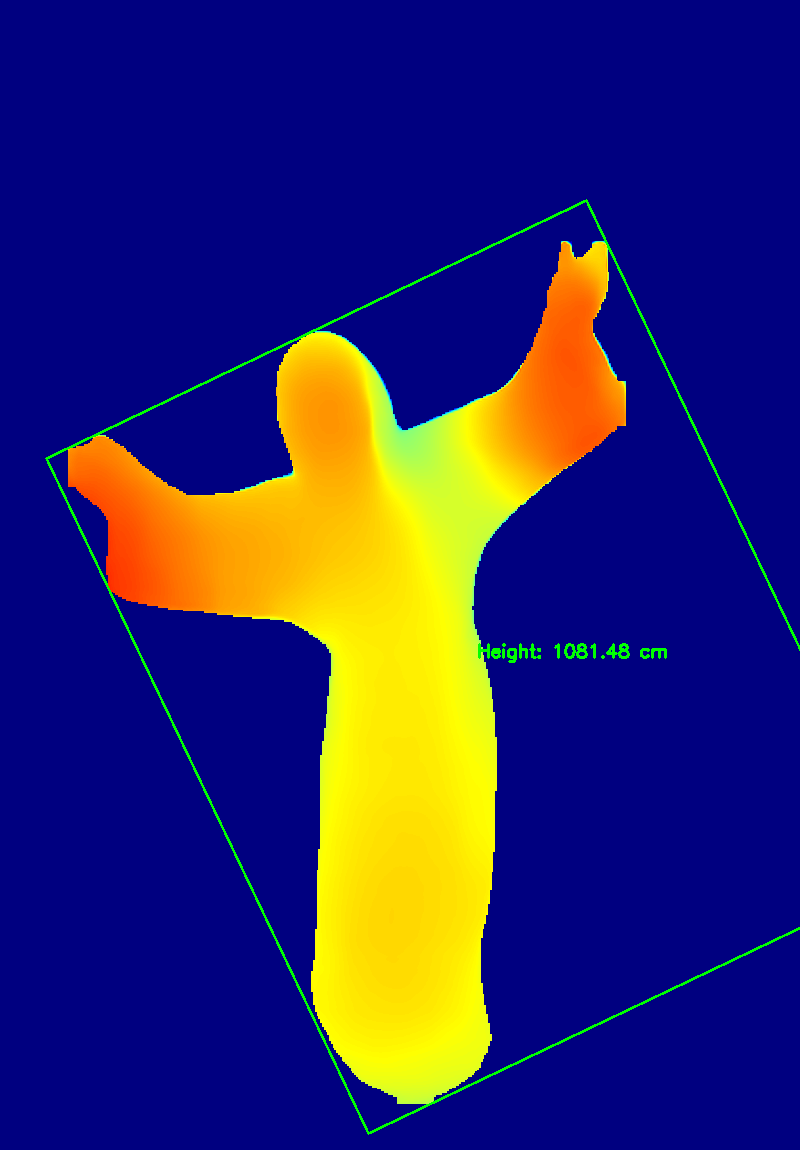

In [ ]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Load MiDaS depth estimation model
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Large")
midas.to("cuda" if torch.cuda.is_available() else "cpu")
midas.eval()

# Load MiDaS transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

# Load YOLOv8-seg for segmentation
yolo_model = YOLO("yolov8m-seg.pt")

# Load input image
filename = "/content/statue.jpg"
image = cv2.imread(filename)
if image is None:
    raise ValueError("Image not found or unable to load.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply YOLOv8 segmentation with confidence threshold
results = yolo_model(image_rgb, conf=0.25)  # Lower confidence threshold

if len(results[0].masks) == 0:
    raise ValueError("No object detected by YOLO segmentation.")

# Extract largest mask
masks = results[0].masks.data.cpu().numpy()
segmentation_mask = np.max(masks, axis=0)  # Use max mask (for overlapping detections)
segmentation_mask = (segmentation_mask * 255).astype(np.uint8)
segmentation_mask = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Apply mask to extract object
segmented_object = cv2.bitwise_and(image_rgb, image_rgb, mask=segmentation_mask)

# Convert segmented object for MiDaS
input_batch = transform(segmented_object).to("cuda" if torch.cuda.is_available() else "cpu")

# Predict depth map using MiDaS
with torch.no_grad():
    depth_prediction = midas(input_batch)
    depth_prediction = torch.nn.functional.interpolate(
        depth_prediction.unsqueeze(1),
        size=image.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = depth_prediction.cpu().numpy()

# Normalize depth map
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
depth_map = (depth_map * 255).astype(np.uint8)

# Apply segmentation mask to depth map
depth_map_filtered = depth_map * (segmentation_mask > 0)

# Apply color map for visualization
depth_map_colored = cv2.applyColorMap(depth_map_filtered, cv2.COLORMAP_JET)

# Detect contours in the depth map for height estimation
gray = cv2.cvtColor(depth_map_colored, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Get the largest contour (assumed to be the object)
    largest_contour = max(contours, key=cv2.contourArea)

    # Use minAreaRect to get a better bounding box
    rect = cv2.minAreaRect(largest_contour)
    (x, y), (w, h), angle = rect

    # **🔹 Relative Depth-to-Height Conversion**
    known_distance_cm = 300  # Assume known camera-object distance
    reference_depth = np.median(depth_map_filtered[segmentation_mask > 0])  # Median object depth

    if reference_depth > 0:
        scale_factor = known_distance_cm / reference_depth
        estimated_height_cm = h * scale_factor
    else:
        estimated_height_cm = 0  # Fallback if depth is unreliable

    # Draw bounding box
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.drawContours(depth_map_colored, [box], 0, (0, 255, 0), 2)

    # Add text annotation
    cv2.putText(depth_map_colored, f"Height: {estimated_height_cm:.2f} cm",
                (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display final depth estimation
cv2_imshow(depth_map_colored)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master



0: 640x480 2 persons, 1 bottle, 3 chairs, 1 dining table, 1 laptop, 1 vase, 68.6ms
Speed: 3.6ms preprocess, 68.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
YOLO Detection Details: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0., 39., 56., 60., 56., 75.,  0., 63., 56.], device='cuda:0')
conf: tensor([0.7045, 0.6971, 0.6315, 0.6123, 0.5687, 0.5415, 0.4093, 0.1163, 0.1116], device='cuda:0')
data: tensor([[6.1520e+01, 4.2180e+02, 3.5048e+02, 9.0601e+02, 7.0447e-01, 0.0000e+00],
        [3.7310e+02, 1.6305e+02, 7.2801e+02, 1.2041e+03, 6.9715e-01, 3.9000e+01],
        [1.3541e+02, 5.1777e+02, 4.0064e+02, 1.0245e+03, 6.3153e-01, 5.6000e+01],
        [3.3481e+00, 1.0370e+03, 1.1957e+03, 1.5946e+03, 6.1230e-01, 6.0000e+01],
        [2.9682e-01, 6.3072e+02, 1.9604e+02, 1.0707e+03, 5.6873e-01, 5.6000e+01],
        [3.7290e+02, 1.6421e+02, 7.2855e+02, 1.2064e+03, 5.4147e-01, 7.5000e+01],
        [1.7820e+02, 4.2199e+02, 3.4948e+02, 5.2161e+02, 4.

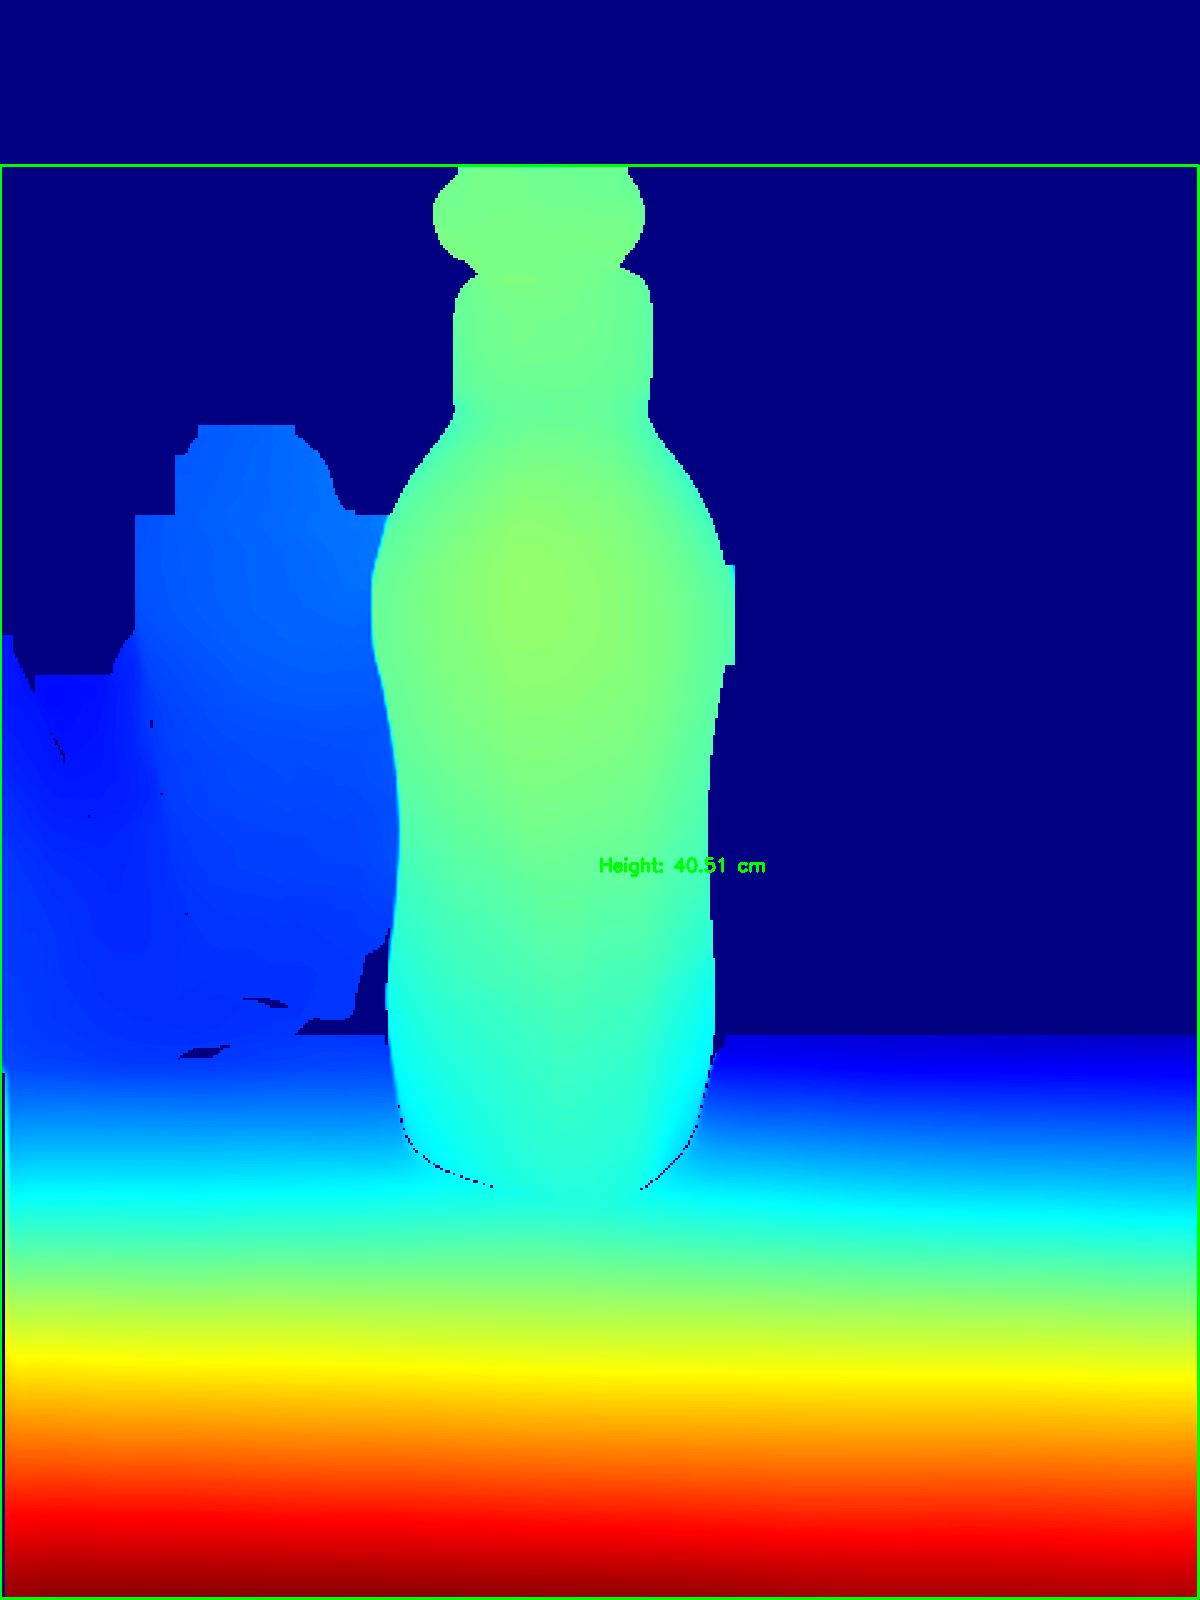

In [ ]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Load MiDaS depth estimation model
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Large")
midas.to("cuda" if torch.cuda.is_available() else "cpu")
midas.eval()

# Load MiDaS transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

# Load YOLOv8-seg for segmentation
yolo_model = YOLO("yolov8x-seg.pt")  # Using 'x' version for better detection

# Load input image
filename = "/content/bottle.jpg"  # Change this to your image path
image = cv2.imread(filename)
if image is None:
    raise ValueError("Image not found or unable to load.")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply YOLOv8 segmentation with lower confidence threshold
results = yolo_model(image_rgb, conf=0.1)

# Debug: Print detection results
print("YOLO Detection Details:", results[0].boxes)  # Bounding boxes
print("YOLO Segmentation Masks:", results[0].masks)  # Masks

# Ensure detections exist
if results[0].masks is None or results[0].masks.data is None:
    raise ValueError("No object detected by YOLO segmentation.")

# Process detected masks
masks = results[0].masks.data.cpu().numpy()
if masks.shape[0] == 0:
    raise ValueError("No object mask found in the detections.")

# Extract largest mask
segmentation_mask = np.max(masks, axis=0)
segmentation_mask = (segmentation_mask * 255).astype(np.uint8)
segmentation_mask = cv2.resize(segmentation_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Apply mask to extract object
segmented_object = cv2.bitwise_and(image_rgb, image_rgb, mask=segmentation_mask)

# Convert segmented object for MiDaS
input_batch = transform(segmented_object).to("cuda" if torch.cuda.is_available() else "cpu")

# Predict depth map using MiDaS
with torch.no_grad():
    depth_prediction = midas(input_batch)
    depth_prediction = torch.nn.functional.interpolate(
        depth_prediction.unsqueeze(1),
        size=image.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

depth_map = depth_prediction.cpu().numpy()

# Normalize depth map
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
depth_map = (depth_map * 255).astype(np.uint8)

# Apply segmentation mask to depth map
depth_map_filtered = depth_map * (segmentation_mask > 0)

# Apply color map for visualization
depth_map_colored = cv2.applyColorMap(depth_map_filtered, cv2.COLORMAP_JET)

# **🔹 Detect contours for height estimation**
gray = cv2.cvtColor(depth_map_colored, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Get the largest contour (assumed to be the object)
    largest_contour = max(contours, key=cv2.contourArea)

    # Use minAreaRect to get a better bounding box
    rect = cv2.minAreaRect(largest_contour)
    (x, y), (w, h), angle = rect

    # **🔹 Relative Depth-to-Height Conversion**
    known_distance_cm = 5  # Adjusted for small objects
    reference_depth = np.percentile(depth_map_filtered[segmentation_mask > 0], 80)  # More stable depth reference


    if reference_depth > 0:
        scale_factor = known_distance_cm / reference_depth
        estimated_height_cm = h * scale_factor
    else:
        estimated_height_cm = 0  # Fallback if depth is unreliable

    # Draw bounding box
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.drawContours(depth_map_colored, [box], 0, (0, 255, 0), 2)

    # Add text annotation
    cv2.putText(depth_map_colored, f"Height: {estimated_height_cm:.2f} cm",
                (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display final depth estimation
cv2_imshow(depth_map_colored)
